# GAN

In [2]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else 'cpu')
BATCH_SIZE= 64
EPOCHS = 50
LATENT_DIM = 100

In [5]:
transform  = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))]
)
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)




In [ ]:
v

In [10]:
generator = Generator().to(DEVICE)


In [ ]:
class Disriminator(nn.Module):
    def __init__(self):
        super(Disriminator, self).__init__()

        self.model = nn.Sequential(
            nn.Conv2d(1,64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2,inplace=True),

            nn.Conv2d(64,128,kernel_size=4,stride=2,padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            
        )

In [11]:
#판별자 
#28x28x1 크기를 입력 받아서 해당 이미지가 진짜일 확률 
class Disriminator(nn.Module):
    def __init__(self):
        super(Disriminator, self).__init__()


        self.model = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),


            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),


            nn.Flatten(),
            nn.Linear(128 * 7 * 7, 1)
        )


    def forward(self, img):
        validity = self.model(img)
        return validity
   
discriminator = Disriminator().to(DEVICE)


In [13]:
#손실함수 및 옵티마이저 정의 
# 손실함수
adversarial_loss = nn.BCEWithLogitsLoss()


# 옵티마이저
optimizer_G = torch.optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))


In [15]:
def view_images(epoch, generator, latent_dim, device):
    with torch.no_grad():
        z = torch.randn(16, latent_dim).to(device)
        generated = generator(z).cpu()


        fig, axes = plt.subplots(4,4, figsize=(4,4))
        for i, ax in enumerate(axes.flat):
            img = generated[i] * 0.5 + 0.5
            ax.imshow(img.squeeze(), cmap='gray')
            ax.axis('off')


        plt.savefig(f"image_at_epoch_{epoch:04d}.png")
        plt.show


[Epoch 0/50] [D loss: 0.0008] [G loss: 7.2272]
[Epoch 1/50] [D loss: 0.0001] [G loss: 9.2617]
[Epoch 2/50] [D loss: 0.0000] [G loss: 10.5597]
[Epoch 3/50] [D loss: 0.0001] [G loss: 10.5319]
[Epoch 4/50] [D loss: 0.0000] [G loss: 11.4466]
[Epoch 5/50] [D loss: 0.0000] [G loss: 11.4058]
[Epoch 6/50] [D loss: 0.0000] [G loss: 12.4283]
[Epoch 7/50] [D loss: 0.0000] [G loss: 13.0894]
[Epoch 8/50] [D loss: 0.2762] [G loss: 2.1847]
[Epoch 9/50] [D loss: 0.6556] [G loss: 0.4240]
[Epoch 10/50] [D loss: 0.3426] [G loss: 1.8981]
[Epoch 11/50] [D loss: 0.4088] [G loss: 0.7332]
[Epoch 12/50] [D loss: 0.3258] [G loss: 3.3131]
[Epoch 13/50] [D loss: 0.3228] [G loss: 1.1303]
[Epoch 14/50] [D loss: 0.2985] [G loss: 2.0477]
[Epoch 15/50] [D loss: 0.2609] [G loss: 1.6093]
[Epoch 16/50] [D loss: 0.3095] [G loss: 2.4479]
[Epoch 17/50] [D loss: 0.3013] [G loss: 1.7443]
[Epoch 18/50] [D loss: 0.2640] [G loss: 1.9279]
[Epoch 19/50] [D loss: 0.2870] [G loss: 1.7837]
[Epoch 20/50] [D loss: 0.2824] [G loss: 2.30

/tmp/ipykernel_8944/833613301.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(4,4, figsize=(4,4))


[Epoch 21/50] [D loss: 0.2753] [G loss: 1.7633]
[Epoch 22/50] [D loss: 0.3172] [G loss: 1.4184]
[Epoch 23/50] [D loss: 0.3214] [G loss: 1.3143]
[Epoch 24/50] [D loss: 0.2860] [G loss: 1.6909]
[Epoch 25/50] [D loss: 0.1984] [G loss: 2.0764]
[Epoch 26/50] [D loss: 0.2610] [G loss: 1.7721]
[Epoch 27/50] [D loss: 0.2328] [G loss: 2.4477]
[Epoch 28/50] [D loss: 0.3649] [G loss: 1.7226]
[Epoch 29/50] [D loss: 0.3192] [G loss: 1.9401]
[Epoch 30/50] [D loss: 0.2762] [G loss: 1.7359]
[Epoch 31/50] [D loss: 0.3113] [G loss: 2.7958]
[Epoch 32/50] [D loss: 0.3238] [G loss: 1.6422]
[Epoch 33/50] [D loss: 0.3889] [G loss: 2.0297]
[Epoch 34/50] [D loss: 0.2639] [G loss: 1.9350]
[Epoch 35/50] [D loss: 0.5279] [G loss: 0.9327]
[Epoch 36/50] [D loss: 0.6150] [G loss: 0.6956]
[Epoch 37/50] [D loss: 0.3580] [G loss: 1.8459]
[Epoch 38/50] [D loss: 0.2522] [G loss: 2.2442]
[Epoch 39/50] [D loss: 0.4034] [G loss: 2.5144]
[Epoch 40/50] [D loss: 0.3390] [G loss: 2.0486]
[Epoch 41/50] [D loss: 0.3150] [G loss: 

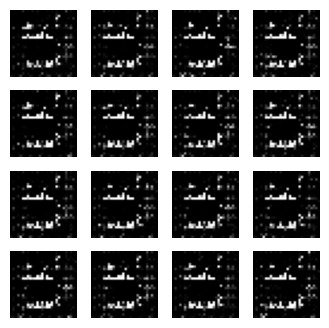

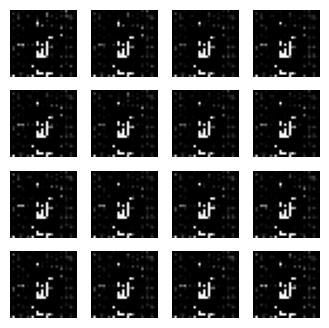

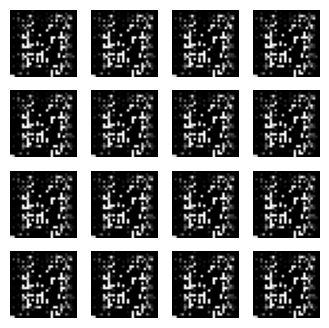

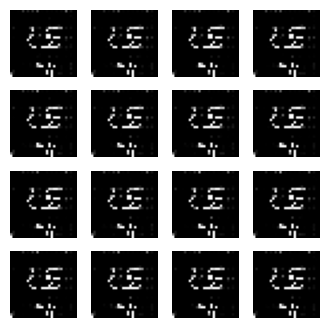

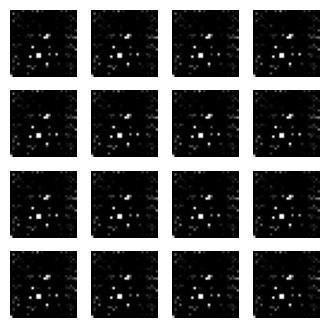

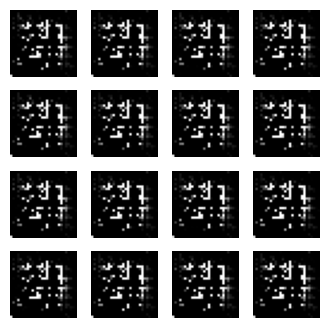

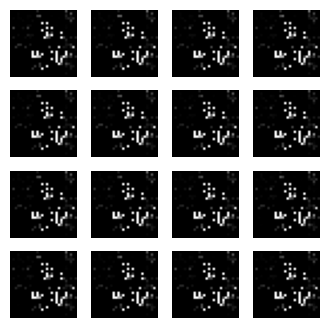

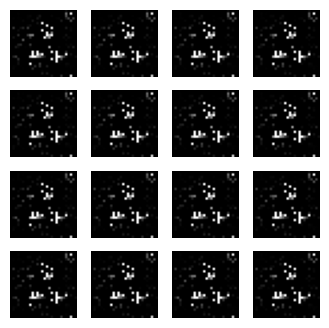

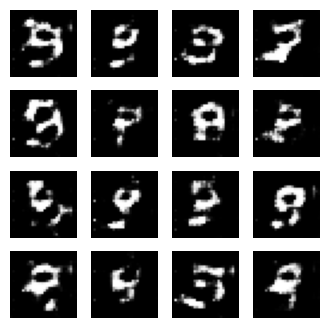

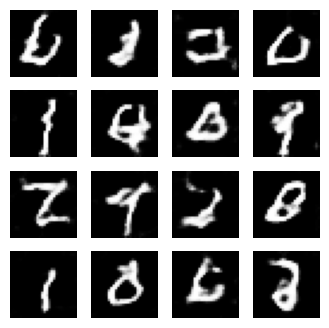

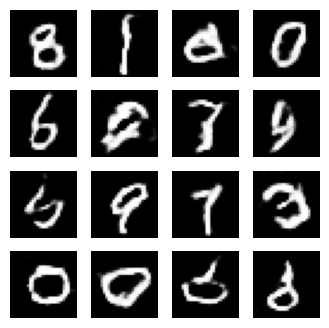

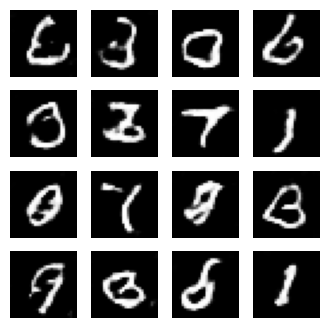

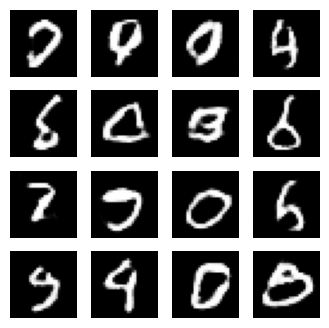

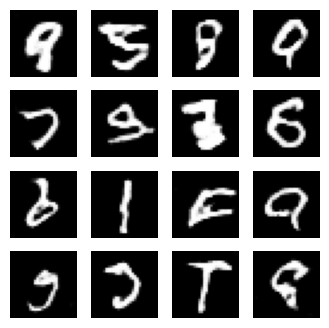

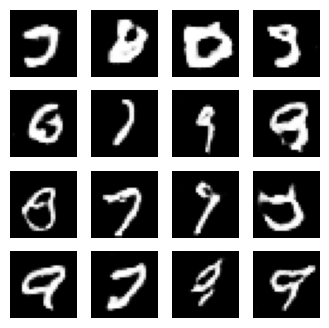

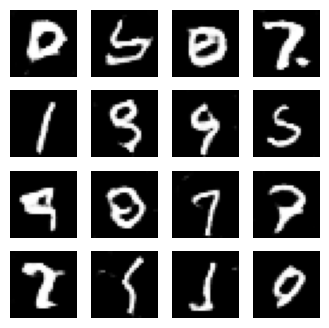

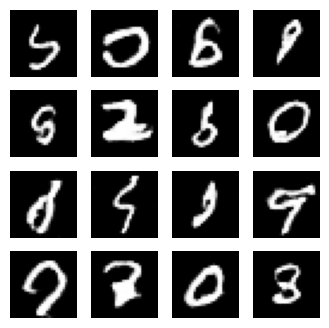

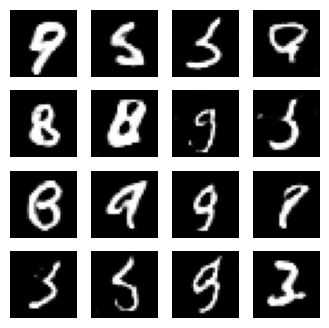

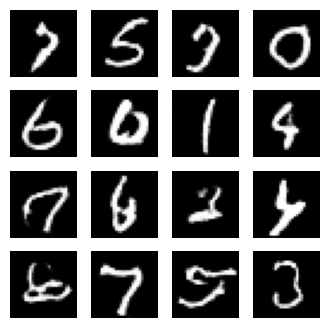

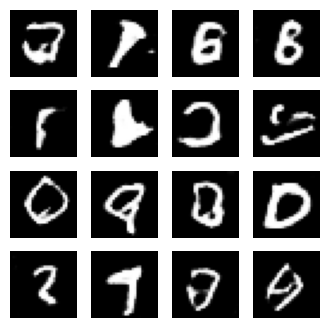

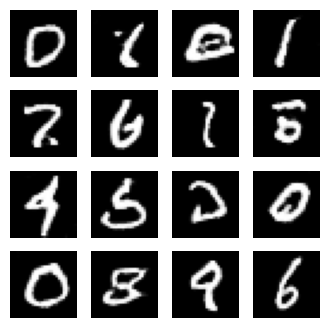

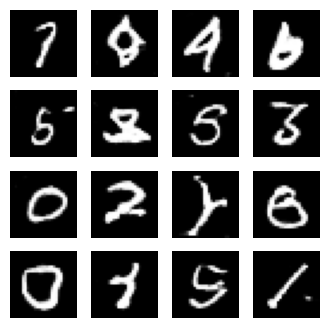

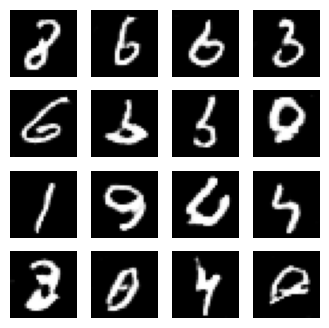

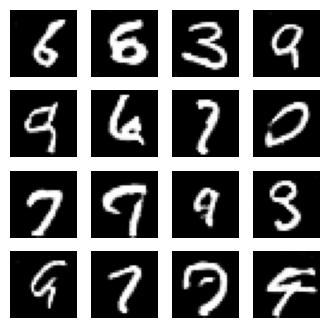

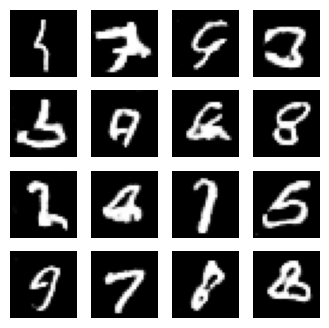

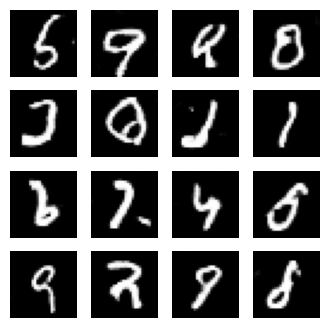

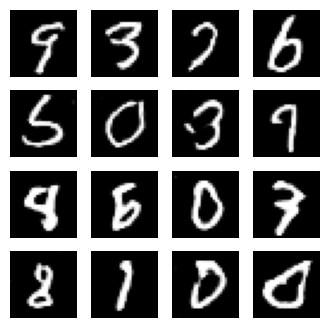

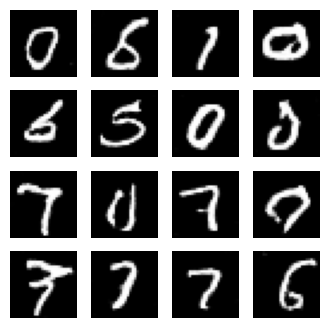

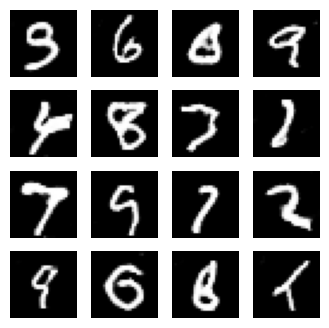

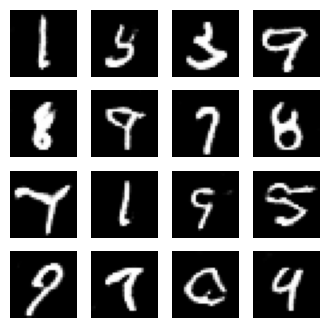

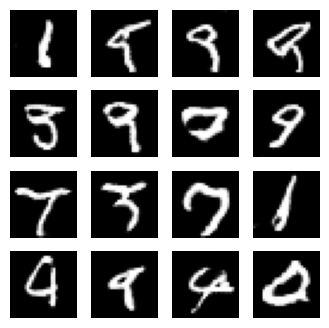

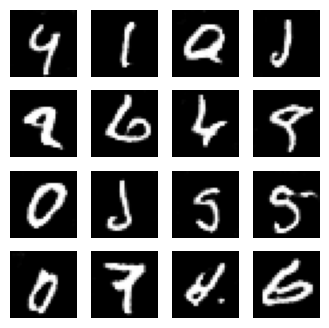

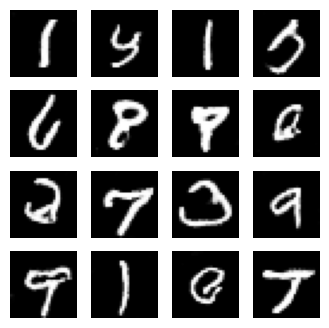

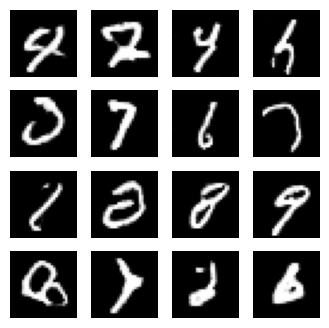

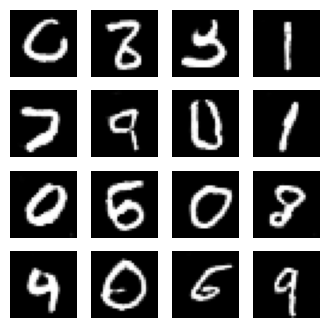

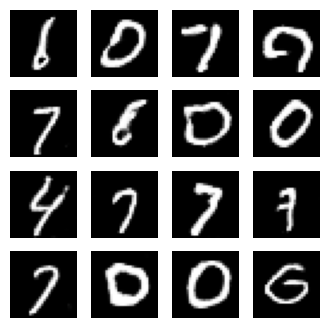

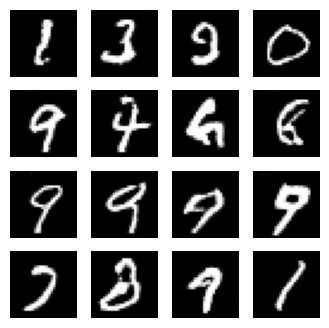

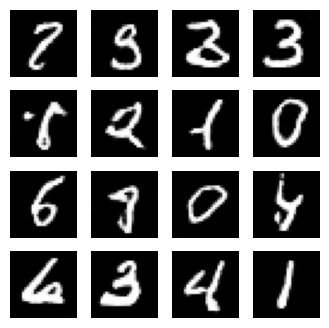

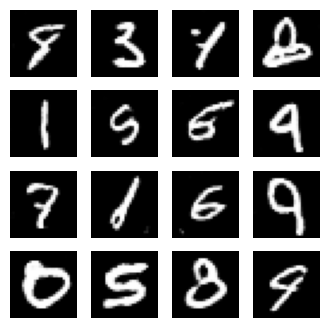

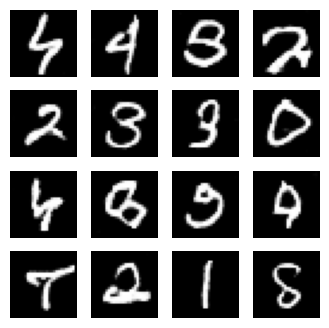

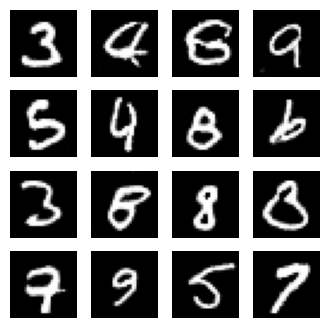

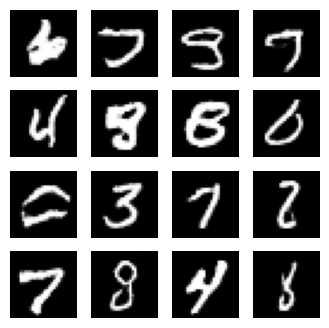

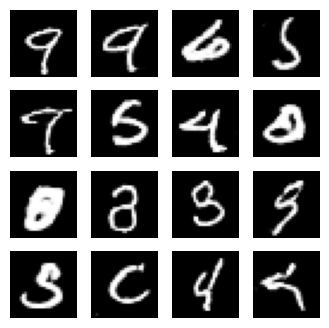

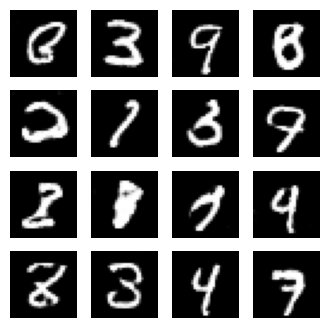

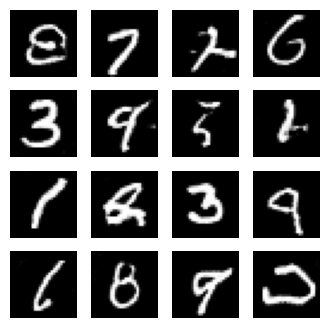

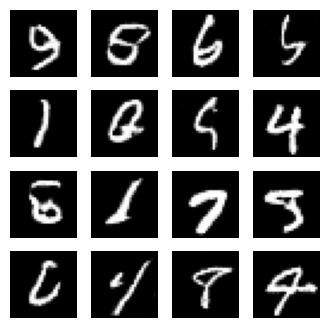

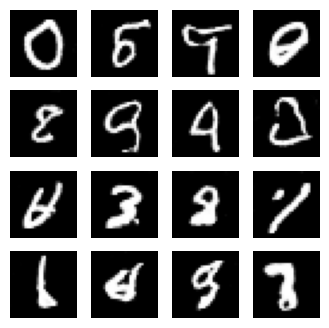

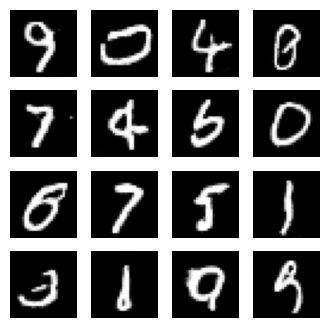

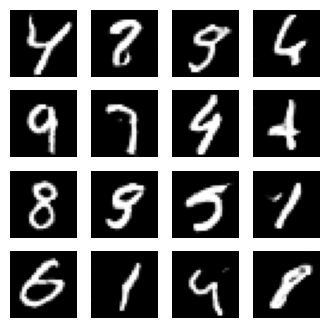

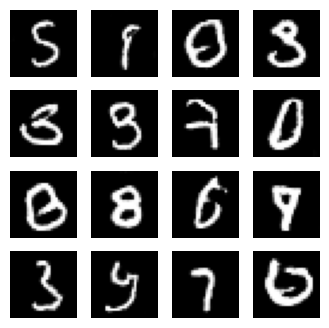

In [17]:
for epoch in range(EPOCHS):
    for i, (imgs, _) in enumerate(train_loader):
       
        # 실제 이미지와 가짜 이미지에 대한 레이블 생성
        real_labels = torch.ones(imgs.size(0), 1).to(DEVICE)
        fake_labels = torch.zeros(imgs.size(0), 1).to(DEVICE)
       
        # 실제 이미지를 장치(GPU/CPU)로 이동
        real_imgs = imgs.to(DEVICE)
       
        # ---------------------
        #  생성자(Generator) 학습
        # ---------------------
        optimizer_G.zero_grad()
       
        # 노이즈를 샘플링하여 가짜 이미지 생성
        z = torch.randn(imgs.size(0), LATENT_DIM).to(DEVICE)
        generated_imgs = generator(z)
       
        # 생성자 손실 계산 (판별자를 속이도록)
        g_loss = adversarial_loss(discriminator(generated_imgs), real_labels)
       
        # 생성자 역전파 및 가중치 업데이트
        g_loss.backward()
        optimizer_G.step()
       
        # ---------------------
        #  판별자(Discriminator) 학습
        # ---------------------
        optimizer_D.zero_grad()
       
        # 실제 이미지에 대한 손실 계산
        real_loss = adversarial_loss(discriminator(real_imgs), real_labels)
       
        # 가짜 이미지에 대한 손실 계산
        fake_loss = adversarial_loss(discriminator(generated_imgs.detach()), fake_labels)
        # .detach()를 사용하여 생성자의 그래디언트가 판별자 학습에 영향을 주지 않도록 함
       
        d_loss = (real_loss + fake_loss) / 2
       
        # 판별자 역전파 및 가중치 업데이트
        d_loss.backward()
        optimizer_D.step()


    # 에포크 종료 후 로그 출력
    print(f"[Epoch {epoch}/{EPOCHS}] [D loss: {d_loss.item():.4f}] [G loss: {g_loss.item():.4f}]")
    view_images(epoch, generator, LATENT_DIM, DEVICE)

# 스테이블 디퓨전

In [24]:
import torch 
from diffusers import DDPMPipeline
from genaibook.core import get_device


Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]An error occurred while trying to fetch /home/sunsnu/.cache/huggingface/hub/models--google--ddpm-celebahq-256/snapshots/cd5c944777ea2668051904ead6cc120739b86c4d: Error no file named diffusion_pytorch_model.safetensors found in directory /home/sunsnu/.cache/huggingface/hub/models--google--ddpm-celebahq-256/snapshots/cd5c944777ea2668051904ead6cc120739b86c4d.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
100%|██████████| 1000/1000 [01:40<00:00,  9.95it/s]


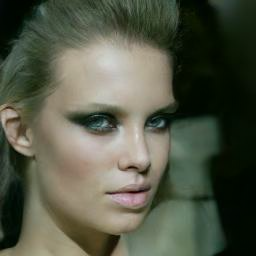

In [25]:
# We can set the device to use our GPU or CPU
device = get_device()


# Load the pipeline
image_pipe = DDPMPipeline.from_pretrained("google/ddpm-celebahq-256")
image_pipe.to(device)


# Sample an image
image_pipe().images[0]


100%|██████████| 1000/1000 [01:39<00:00, 10.05it/s]


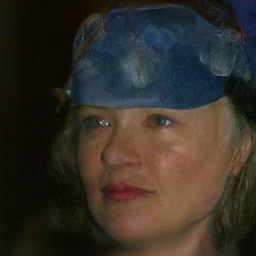

In [26]:
image_pipe().images[0]


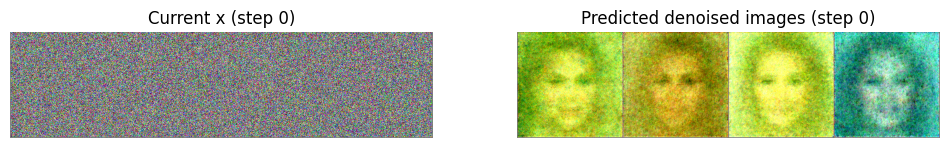

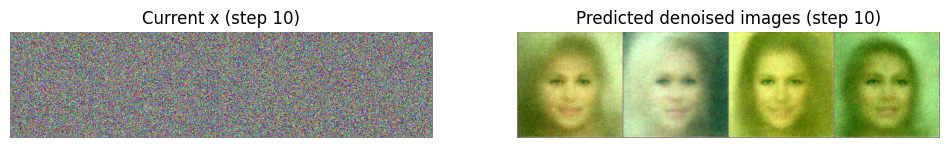

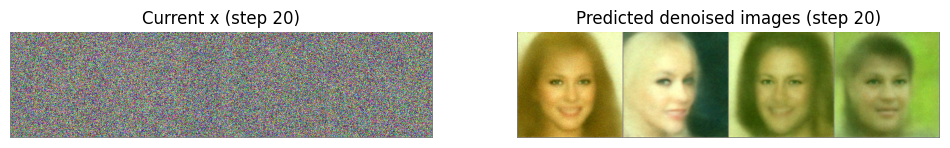

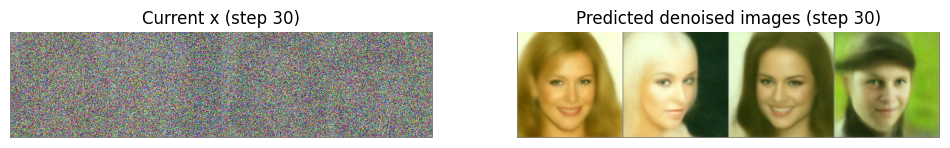

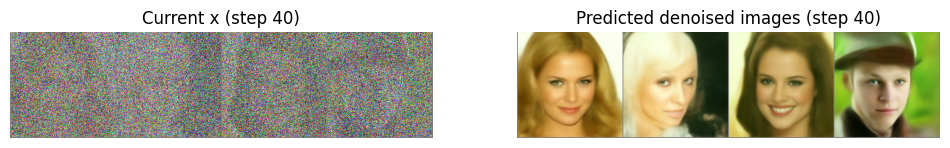

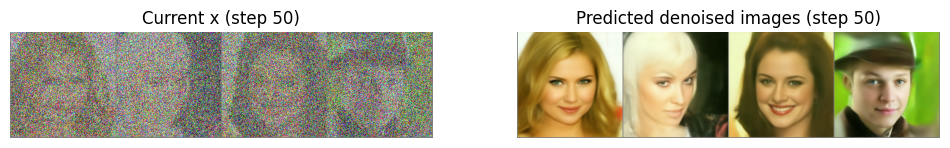

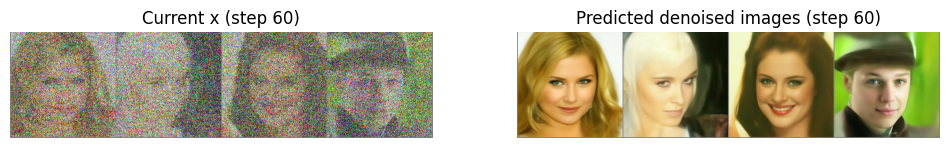

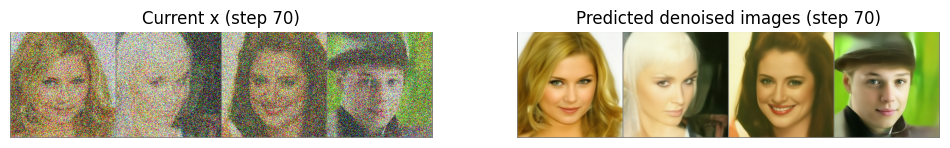

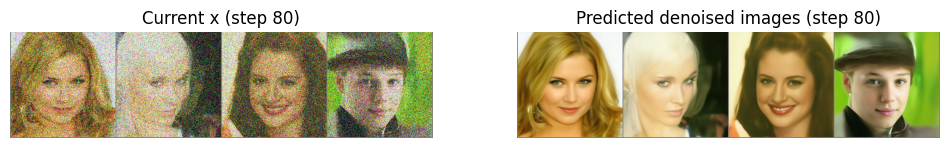

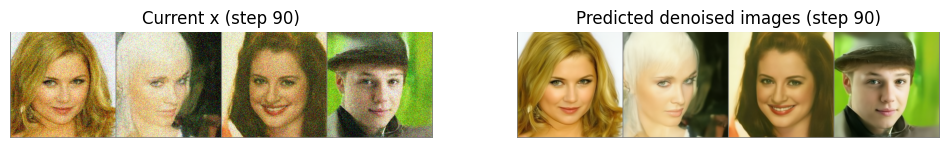

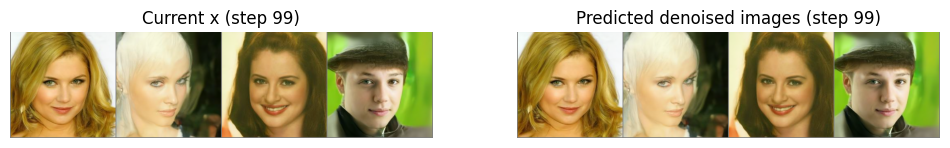

In [27]:
from genaibook.core import plot_noise_and_denoise
image = torch.randn(4, 3, 256, 256).to(device)
image_pipe.scheduler.set_timesteps(num_inference_steps=100)
for i, t in enumerate(image_pipe.scheduler.timesteps):
    with torch.inference_mode():
        noise_pred = image_pipe.unet(image, t)["sample"]
    scheduler_output = image_pipe.scheduler.step(noise_pred, t, image)
    image = scheduler_output.prev_sample
    if i % 10 == 0 or i == len(image_pipe.scheduler.timesteps) - 1:
        plot_noise_and_denoise(scheduler_output, i)


In [29]:
from datasets import load_dataset


dataset = load_dataset("huggan/smithsonian_butterflies_subset", split="train")




from torchvision import transforms
image_size = 384
preprocess = transforms.Compose(
    [
        transforms.Resize((image_size, image_size)),  # Resize
        transforms.RandomHorizontalFlip(),  # Randomly flip (data augmentation)
        transforms.ToTensor(),  # Convert to tensor (0, 1)
        transforms.Normalize([0.5], [0.5]),  # Map to (-1, 1)
    ]
)

Repo card metadata block was not found. Setting CardData to empty.


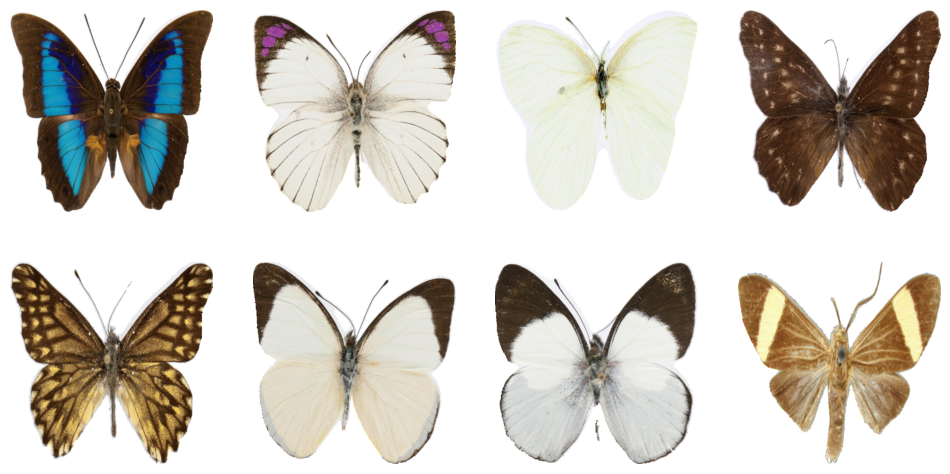

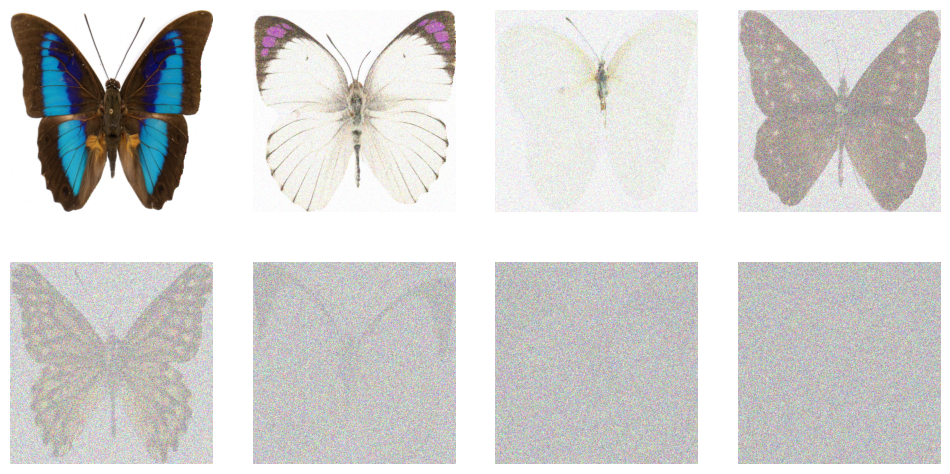

In [36]:
def transform(examples):
    examples = [preprocess(image) for image in examples["image"]]
    return {"images": examples}




dataset.set_transform(transform)
batch_size = 16


train_dataloader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, shuffle=True
)


batch = next(iter(train_dataloader))


from genaibook.core import show_images
show_images(batch["images"][:8] * 0.5 + 0.5)



from diffusers import DDPMScheduler


scheduler = DDPMScheduler(
    num_train_timesteps=1000, beta_start=0.001, beta_end=0.02
)


timesteps = torch.linspace(0, 999, 8).long()
x = batch["images"][:8]
noise = torch.rand_like(x)
noised_x = scheduler.add_noise(x, noise, timesteps)
show_images((noised_x * 0.5 + 0.5).clip(0, 1))


## UNET

In [6]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')


In [42]:
from diffusers import UNetMotionModel

In [7]:
from diffusers import UNet2DModel


model = UNet2DModel(
    in_channels=3,  # 3 channels for RGB images
    sample_size=64,  # Specify our input size
    # The number of channels per block affects the model size
    block_out_channels=(64, 128, 256, 512),
    down_block_types=(
        "DownBlock2D",
        "DownBlock2D",
        "AttnDownBlock2D",
        "AttnDownBlock2D",
    ),
    up_block_types=("AttnUpBlock2D", "AttnUpBlock2D", "UpBlock2D", "UpBlock2D"),
).to(device)


with torch.inference_mode():
    out = model(noised_x.to(device), timestep=timesteps.to(device)).sample


from torchvision import transforms
batch_size = 8
preprocess = transforms.Compose(
    [
        transforms.Resize((image_size, image_size)),  # Resize
        transforms.RandomHorizontalFlip(),  # Randomly flip (data augmentation)
        transforms.ToTensor(),  # Convert to tensor (0, 1)
        transforms.Normalize([0.5], [0.5]),  # Map to (-1, 1)
    ]
)
def transform(examples):
    examples = [preprocess(image) for image in examples["image"]]
    return {"images": examples}




dataset.set_transform(transform)


train_dataloader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, shuffle=True
)


from torch.nn import functional as F
num_epochs = 50
lr = 1e-4 
optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
losses = [] 


NameError: name 'noised_x' is not defined

In [2]:
for epoch in range(num_epochs):
    for batch in train_dataloader:
        clean_images = batch["images"].to(device)
        noise = torch.randn(clean_images.shape).to(device)
        timesteps = torch.randint(
                    0,
                    scheduler.config.num_train_timesteps,
                    (clean_images.shape[0],),
                    device=device,
                ).long()
        noisy_images = scheduler.add_noise(clean_images, noise, timesteps)
        noise_pred = model(noisy_images, timesteps, return_dict=False)[0]
        loss = F.mse_loss(noise_pred, noise)
        losses.append(loss.item())
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    avg_loss = sum(losses[-len(train_dataloader) :]) / len(train_dataloader)
    print(
        f"Finished epoch {epoch}. Average loss for this epoch: {avg_loss:05f}"
    )


NameError: name 'num_epochs' is not defined

Repo card metadata block was not found. Setting CardData to empty.


Finished epoch 0. Average loss for this epoch: 0.419806
Finished epoch 1. Average loss for this epoch: 0.110872
Finished epoch 2. Average loss for this epoch: 0.079935
Finished epoch 3. Average loss for this epoch: 0.074822
Finished epoch 4. Average loss for this epoch: 0.060657
Finished epoch 5. Average loss for this epoch: 0.053847
Finished epoch 6. Average loss for this epoch: 0.045373
Finished epoch 7. Average loss for this epoch: 0.043582
Finished epoch 8. Average loss for this epoch: 0.035738
Finished epoch 9. Average loss for this epoch: 0.037382
Finished epoch 10. Average loss for this epoch: 0.035051
Finished epoch 11. Average loss for this epoch: 0.033082
Finished epoch 12. Average loss for this epoch: 0.028300
Finished epoch 13. Average loss for this epoch: 0.029671
Finished epoch 14. Average loss for this epoch: 0.028511
Finished epoch 15. Average loss for this epoch: 0.026998
Finished epoch 16. Average loss for this epoch: 0.026711
Finished epoch 17. Average loss for this 

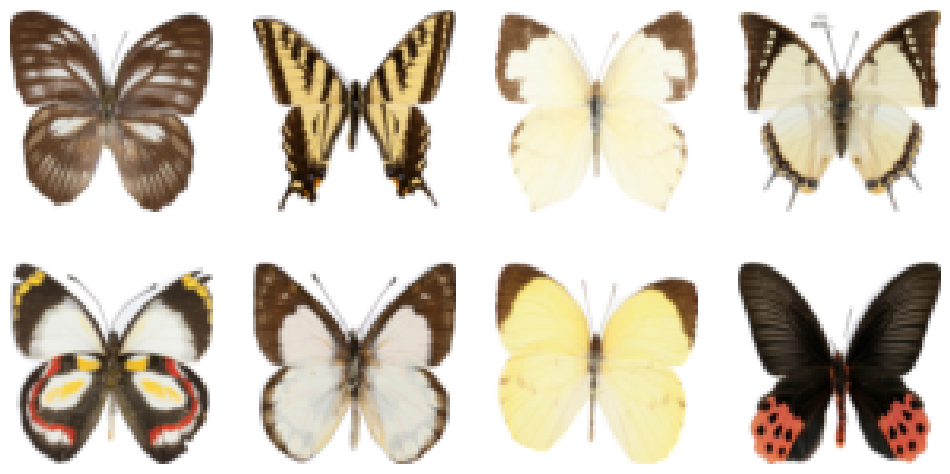

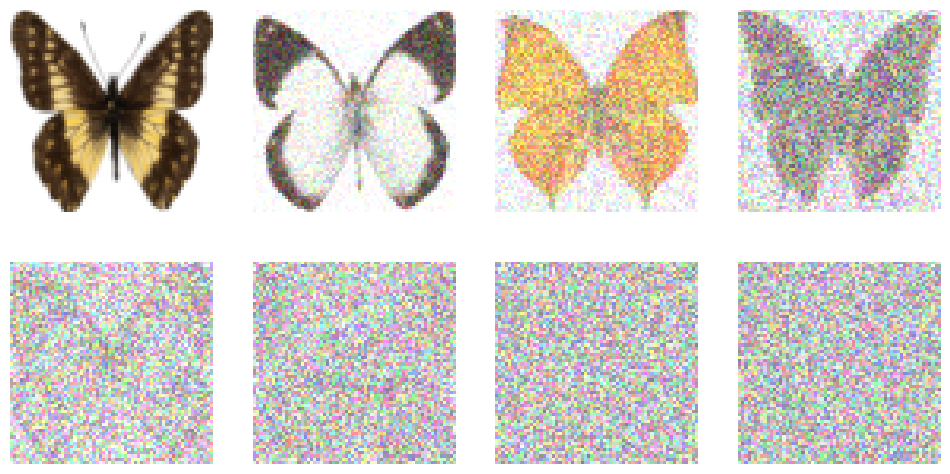

In [10]:
from datasets import load_dataset
import torch
device = 'cuda'

batch = next(iter(train_dataloader))



dataset = load_dataset("huggan/smithsonian_butterflies_subset", split="train")




from torchvision import transforms
image_size = 64
preprocess = transforms.Compose(
    [
        transforms.Resize((image_size, image_size)),  # Resize
        transforms.RandomHorizontalFlip(),  # Randomly flip (data augmentation)
        transforms.ToTensor(),  # Convert to tensor (0, 1)
        transforms.Normalize([0.5], [0.5]),  # Map to (-1, 1)
    ]
)




def transform(examples):
    examples = [preprocess(image) for image in examples["image"]]
    return {"images": examples}




dataset.set_transform(transform)
batch_size = 32


train_dataloader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, shuffle=True
)




from genaibook.core import show_images
show_images(batch["images"][:8] * 0.5 + 0.5)
batch = next(iter(train_dataloader))


from diffusers import DDPMScheduler


scheduler = DDPMScheduler(
    num_train_timesteps=1000, beta_start=0.001, beta_end=0.02
)


timesteps = torch.linspace(0, 999, 8).long()
x = batch["images"][:8]
noise = torch.rand_like(x)
noised_x = scheduler.add_noise(x, noise, timesteps)
show_images((noised_x * 0.5 + 0.5).clip(0, 1))






from diffusers import UNet2DModel


model = UNet2DModel(
    in_channels=3,  # 3 channels for RGB images
    sample_size=64,  # Specify our input size
    # The number of channels per block affects the model size
    block_out_channels=(64, 128, 256, 512),
    down_block_types=(
        "DownBlock2D",
        "DownBlock2D",
        "AttnDownBlock2D",
        "AttnDownBlock2D",
    ),
    up_block_types=("AttnUpBlock2D", "AttnUpBlock2D", "UpBlock2D", "UpBlock2D"),
).to(device)


with torch.inference_mode():
    out = model(noised_x.to(device), timestep=timesteps.to(device)).sample


from torchvision import transforms
batch_size = 32
preprocess = transforms.Compose(
    [
        transforms.Resize((image_size, image_size)),  # Resize
        transforms.RandomHorizontalFlip(),  # Randomly flip (data augmentation)
        transforms.ToTensor(),  # Convert to tensor (0, 1)
        transforms.Normalize([0.5], [0.5]),  # Map to (-1, 1)
    ]
)
def transform(examples):
    examples = [preprocess(image) for image in examples["image"]]
    return {"images": examples}




dataset.set_transform(transform)


train_dataloader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, shuffle=True
)


from torch.nn import functional as F
num_epochs = 50
lr = 1e-4 
optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
losses = [] 




for epoch in range(num_epochs):
    for batch in train_dataloader:
        clean_images = batch["images"].to(device)
        noise = torch.randn(clean_images.shape).to(device)
        timesteps = torch.randint(
                    0,
                    scheduler.config.num_train_timesteps,
                    (clean_images.shape[0],),
                    device=device,
                ).long()
        noisy_images = scheduler.add_noise(clean_images, noise, timesteps)
        noise_pred = model(noisy_images, timesteps, return_dict=False)[0]
        loss = F.mse_loss(noise_pred, noise)
        losses.append(loss.item())
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    avg_loss = sum(losses[-len(train_dataloader) :]) / len(train_dataloader)
    print(
        f"Finished epoch {epoch}. Average loss for this epoch: {avg_loss:05f}"
    )


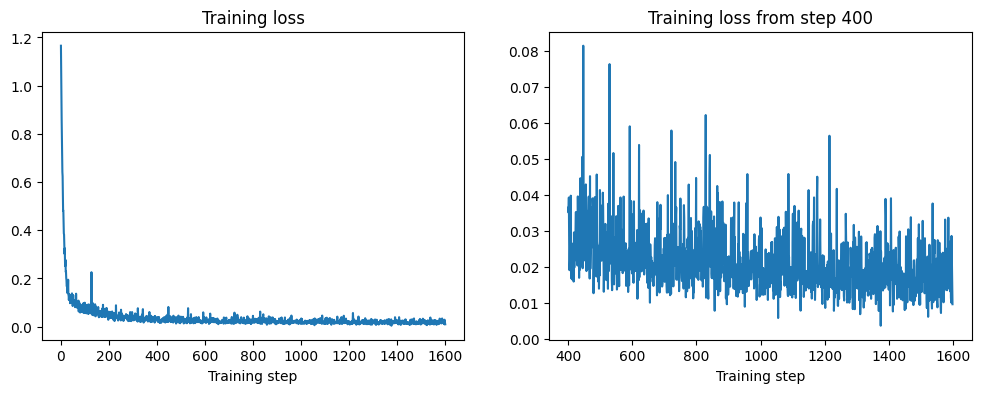

In [11]:
from matplotlib import pyplot as plt


plt.subplots(1, 2, figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title("Training loss")
plt.xlabel("Training step")


plt.subplot(1, 2, 2)
plt.plot(range(400, len(losses)), losses[400:])
plt.title("Training loss from step 400")
plt.xlabel("Training step");




In [12]:
sample = torch.randn(4, 3, 64, 64).to(device)


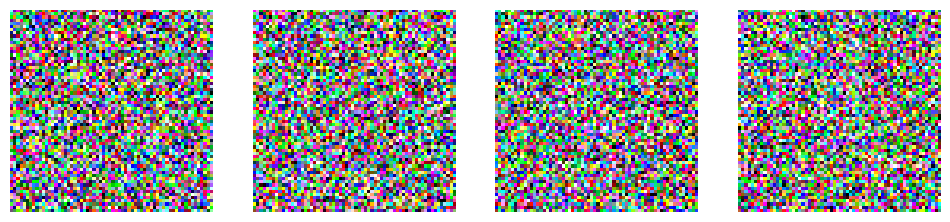

In [13]:
show_images(sample.clip(-1, 1) * 0.5 + 0.5, nrows=1)


In [16]:
for t in scheduler.timesteps:
    with torch.inference_mode():
        noise_pred = model(sample, t)["sample"]
        
sample = scheduler.step(noise_pred, t, sample).prev_sample


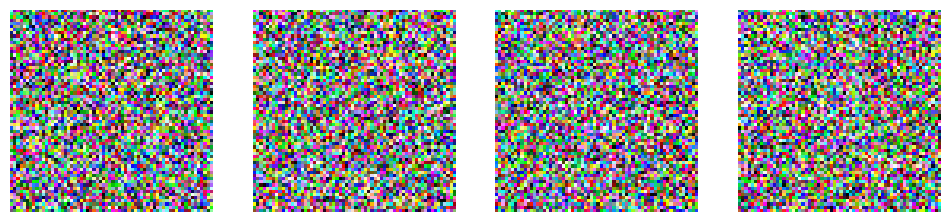

In [17]:
show_images(sample.clip(-1, 1) * 0.5 + 0.5, nrows=1)


# LangChain 프롬프트 

In [19]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI


prompt = ChatPromptTemplate.from_messages([
    ('system', '당신은 친절한 어시스턴트입니다. 모든 질문에 최선을 다해 답하세요'),
    ('placeholder', '{message}')
])


In [23]:
model = ChatOpenAI(model = 'gpt-4o-mini')

chain = prompt | model
response = chain.invoke({
    'messages' : [
        ('human', '다음 한국어 문장을 프랑스어로 번역하세요.: 나는 프로그래밍을 좋아해요'),
        ('ai', 'J\'adore programmer.'),
        ('human', '뭐라고 말했죠?'),
    ]
})
print(response.content)

네, 맞습니다! 어떤 질문이든지 최선을 다해 답변해 드리겠습니다. 무엇을 도와드릴까요?


# LangGraph

In [33]:
from typing import Annotated, TypedDict


from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, START, END, add_messages
from langgraph.checkpoint.memory import MemorySaver


In [34]:

class State(TypedDict):
    messages: Annotated[list, add_messages]

builder = StateGraph(State)
model = ChatOpenAI(model = 'gpt-5-2025-08-07')


In [35]:
def chatbot(state: State):
    answer = model.invoke(state['messages'])
    return {'messages' : [answer]}


builder.add_node('chatbot', chatbot)
builder.add_edge(START, 'chatbot')
builder.add_edge('chatbot', END)
graph = builder.compile()
graph.get_graph().draw_mermaid_png(output_file_path="./mygraph.png")


b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00j\x00\x00\x00\xea\x08\x02\x00\x00\x00\xc5\xf3G\x18\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x16\x8eIDATx\x9c\xed\x9dy|\x13e\xde\xc0\x9f\xc9$i\xce&m\x9a\xd23\xf4\xb2@K\xc1\x92\x1e\x1cV9\xca\xe1\x02"\xc7r\xa3\xec\xbe\xbc,\xa0\xf8\xa2\xab,\xe8\x8a\n\x8a|V\x10\xd4U\x8eE\\^\xb7\x88+\xcbY\x90\xa2\xaf\xb0\x94\xbb@[\x84\xd2\x96\xde\xf4n\xd2\xe6\xbef&\xf3\xfe\x11\xb7v1\xc9\xa4}\x926\xed>\xdf\xbf\x9ayf&\xbf|\xfb\xcc\xcc3\xcf3\xf3\xfc0\x9a\xa6\x01\xa2\xa7\xb0\xfa:\x80\xfe\r\xd2\x07\x05\xd2\x07\x05\xd2\x07\x05\xd2\x07\x05\xd2\x07\x05\x1br\xfb\xe6\x1a\x8bQGY\x8c\x94\xc5DQD\xffh\x03\xe1\x1c\x8c\'\xc0yB\\$\xc1\x07\r\xe6\xc1\xec\n\xebY\xbb\xaf\xfa\xae\xb1\xea\xae\xb1\xf2\x8eA,e\x07\x06sxB\x9c\'dq\xb8\xfd\xa3.\x136\xbb\xc5h7\x1b)\x9d\x9a0j\xc9\xf8\x91\xa2\xb8\xe1\xc2\x98da\x0fv\xd5m}\xad\x0f\xad\x17\xbei%\xac\xf6!i\x81\t\x8f\x8b\xa4rN\x0f\xbe\xd5\x7f\xd0\xb4\x11\x0f\n\xf5e7\xf5\x01|\xd6\xf8_\x87\xca\xa3\x02\xba\xb5y7\xf4Q\x04}\xf1h[m\xa9)sZ\xf0\xb

In [ ]:
# input 변수명이 충돌해 발생한 오류

for chunk in graph.stream(input):
    print(chunk) 

InvalidUpdateError: Expected dict, got <bound method Kernel.raw_input of <ipykernel.ipkernel.IPythonKernel object at 0x78ac6b23d460>>
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/INVALID_GRAPH_NODE_RETURN_VALUE

In [ ]:
# 수정한 코드

from typing import Annotated, TypedDict
from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, START, END, add_messages
from langgraph.checkpoint.memory import MemorySaver

class State(TypedDict):
    messages: Annotated[list, add_messages]

builder = StateGraph(State)
model = ChatOpenAI(model="gpt-4o-mini")  # 유효 모델명으로 교체 권장

def chatbot(state: State):
    answer = model.invoke(state["messages"])
    return {"messages": [answer]}

builder.add_node("chatbot", chatbot)
builder.add_edge(START, "chatbot")
builder.add_edge("chatbot", END)

graph = builder.compile(checkpointer=MemorySaver())

inp: State = {"messages": [HumanMessage(content="8월 18일 있던 역사적인 사건은?")]}

# 필수: thread_id 제공
for chunk in graph.stream(inp, config={"configurable": {"thread_id": "demo-001"}}):
    print(chunk)

# 또는 단발 호출
# result = graph.invoke(inp, config={"configurable": {"thread_id": "demo-001"}})
# print(result["messages"][-1].content)


{'chatbot': {'messages': [AIMessage(content='8월 18일에 일어난 몇 가지 역사적인 사건들을 소개하겠습니다.\n\n1. **1920년**: 미국에서 여성의 투표권을 보장하는 제19차 수정헌법이 발효되었습니다. 이로써 미국의 여성들은 공식적으로 투표할 수 있는 권리를 얻었습니다.\n\n2. **1963년**: 아프리카의 나이지리아에서 군사 쿠데타가 발생하였습니다. 이 사건은 나이지리아 정치 역사에 큰 영향을 미쳤습니다.\n\n3. **1976년**: 삼성전자가 세계 최초로 전자 계약서 시스템을 구현하여 한국의 기업 혁신에 기여했습니다.\n\n4. **1988년**: 이란과 이라크 전쟁이 종식되었습니다. 이 전쟁은 1980년부터 1988년까지 지속되었으며, 수많은 인명 피해와 재정적 손실을 초래했습니다.\n\n각 사건은 그 시대와 지역에서 중요한 의미를 갖고 있습니다. 더 구체적인 사건이나 특정 연도에 대해 알고 싶으시면 말씀해 주세요!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 232, 'prompt_tokens': 19, 'total_tokens': 251, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_51db84afab', 'id': 'chatcmpl-C5mnKTHZSVSOvb6O3NqAdwh367glE', 'service_tier': 'default', 'fini

In [42]:
graph.get_graph().draw_mermaid_png(output_file_path="./mygraph.png")
input = {'messages' : [HumanMessage("8월 18일 있던 역사적인 사건은?")]}
for chunk in graph.stream(input):
    print(chunk)

ValueError: Checkpointer requires one or more of the following 'configurable' keys: thread_id, checkpoint_ns, checkpoint_id

# 기억을 하는 챗봇

In [43]:
class State(TypedDict):
    messages: Annotated[list, add_messages]


builder = StateGraph(State)
model = ChatOpenAI(model = 'gpt-5-2025-08-07')




def chatbot(state: State):
    answer = model.invoke(state['messages'])
    return {'messages' : [answer]}




builder.add_node('chatbot', chatbot)
builder.add_edge(START, 'chatbot')
builder.add_edge('chatbot', END)
graph = builder.compile(checkpointer=MemorySaver())


In [44]:
thread1 = {'configurable' : {'thread_id' : '1'}}


In [45]:
result_1 = graph.invoke({'messages' : [HumanMessage("나는 제미나이다.")]}, thread1)

In [46]:
result_1

{'messages': [HumanMessage(content='나는 제미나이다.', additional_kwargs={}, response_metadata={}, id='a8f753f0-0eb5-4681-8142-b5d50e0cd7c3'),
  AIMessage(content='쌍둥이자리군요! 보통 호기심이 많고, 아이디어 교환과 대화를 즐기며, 다재다능하다는 얘기를 많이 듣는 별자리예요. 어떤 게 궁금하신가요?\n\n- 오늘/이번 주 운세를 재미로 보고 싶어요\n- 연애/궁합이 궁금해요\n- 커리어·학습 강점과 활용 팁 알려줘\n- 대인관계·커뮤니케이션 전략이 궁금해요', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 699, 'prompt_tokens': 12, 'total_tokens': 711, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 576, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-5-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-C5mslgF4F5gla2EKGlgEqbp6SSMHa', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--9e5167ce-6daa-4a11-b029-5c5cd2d5eccf-0', usage_metadata={'input_tokens': 12, 'output_tokens': 699, 'total_tokens': 711, 'input_token_det

In [47]:
result_2 = graph.invoke({'messages' : [HumanMessage("내가 누구라고?")]}, thread1)
print(result_2["messages"][-1].content)


쌍둥이자리(제미나이)라고 하셨어요. 어떤 점이 궁금하신가요?


In [49]:
print(graph.get_state(thread1))

StateSnapshot(values={'messages': [HumanMessage(content='나는 제미나이다.', additional_kwargs={}, response_metadata={}, id='a8f753f0-0eb5-4681-8142-b5d50e0cd7c3'), AIMessage(content='쌍둥이자리군요! 보통 호기심이 많고, 아이디어 교환과 대화를 즐기며, 다재다능하다는 얘기를 많이 듣는 별자리예요. 어떤 게 궁금하신가요?\n\n- 오늘/이번 주 운세를 재미로 보고 싶어요\n- 연애/궁합이 궁금해요\n- 커리어·학습 강점과 활용 팁 알려줘\n- 대인관계·커뮤니케이션 전략이 궁금해요', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 699, 'prompt_tokens': 12, 'total_tokens': 711, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 576, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-5-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-C5mslgF4F5gla2EKGlgEqbp6SSMHa', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--9e5167ce-6daa-4a11-b029-5c5cd2d5eccf-0', usage_metadata={'input_tokens': 12, 'output_tokens': 699, 'total_tokens': 71

In [50]:
graph.update_state(thread1, {'messages' : [HumanMessage("역시 AI는 제미나이야!!")]})
print(graph.get_state(thread1))

StateSnapshot(values={'messages': [HumanMessage(content='나는 제미나이다.', additional_kwargs={}, response_metadata={}, id='a8f753f0-0eb5-4681-8142-b5d50e0cd7c3'), AIMessage(content='쌍둥이자리군요! 보통 호기심이 많고, 아이디어 교환과 대화를 즐기며, 다재다능하다는 얘기를 많이 듣는 별자리예요. 어떤 게 궁금하신가요?\n\n- 오늘/이번 주 운세를 재미로 보고 싶어요\n- 연애/궁합이 궁금해요\n- 커리어·학습 강점과 활용 팁 알려줘\n- 대인관계·커뮤니케이션 전략이 궁금해요', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 699, 'prompt_tokens': 12, 'total_tokens': 711, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 576, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-5-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-C5mslgF4F5gla2EKGlgEqbp6SSMHa', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--9e5167ce-6daa-4a11-b029-5c5cd2d5eccf-0', usage_metadata={'input_tokens': 12, 'output_tokens': 699, 'total_tokens': 71

# LangChain core message

In [51]:
from langchain_core.messages import (SystemMessage, HumanMessage, AIMessage, trim_messages)


messages = [
    SystemMessage(content='당신은 친절한 어시스턴트입니다.'),
    HumanMessage(content='안녕하세요! 나는 플레이입니다.'),
    AIMessage(content='안녕하세요!'),
    HumanMessage(content='바닐라 아이스크림을 좋아해요.'),
    AIMessage(content='좋네요!'),
    HumanMessage(content='2 + 2는 얼마죠?'),
    AIMessage(content='4입니다.'),
    HumanMessage(content='고마워요.'),
    AIMessage(content='천만에요!'),
    HumanMessage(content='즐거운가요?'),
    AIMessage(content='예!'),
]


In [52]:
trimmer = trim_messages(
    max_tokens=65,
    strategy='last',
    token_counter=ChatOpenAI(model = 'gpt-4o-mini'),
    include_system=True,
    allow_partial=False,
    start_on='human'
)
